<a href="https://colab.research.google.com/github/maxaclark/forecasting-video-game-sales/blob/main/Vgsales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("../data/vgsales_clean.csv")
print(df.head())  # show first few rows

# Basic info
print("\n--- Basic Info ---")
print(df.info())
print("\n--- Summary Stats ---")
print(df.describe())

# Sales
num_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df[num_cols].describe()


   Rank                     Name Platform  Year        Genre Publisher  \
0     1               wii sports      wii  2006       sports  nintendo   
1     2         super mario bros      nes  1985     platform  nintendo   
2     3           mario kart wii      wii  2008       racing  nintendo   
3     4        wii sports resort      wii  2009       sports  nintendo   
4     5  pokemon redpokemon blue       gb  1996  roleplaying  nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Decade  \
0     41.49     29.02      3.77         8.46         82.74    2000   
1     29.08      3.58      6.81         0.77         40.24    1980   
2     15.85     12.88      3.79         3.31         35.82    2000   
3     15.75     11.01      3.28         2.96         33.00    2000   
4     11.27      8.89     10.22         1.00         31.37    1990   

   FranchiseTag  Total_Regional_Sales  Sales_Ratio  
0             0                 82.74          1.0  
1             0             

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000
mean,0.265402,0.147567,0.078674,0.048327,0.540246
std,0.821641,0.508811,0.311584,0.189902,1.565855
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


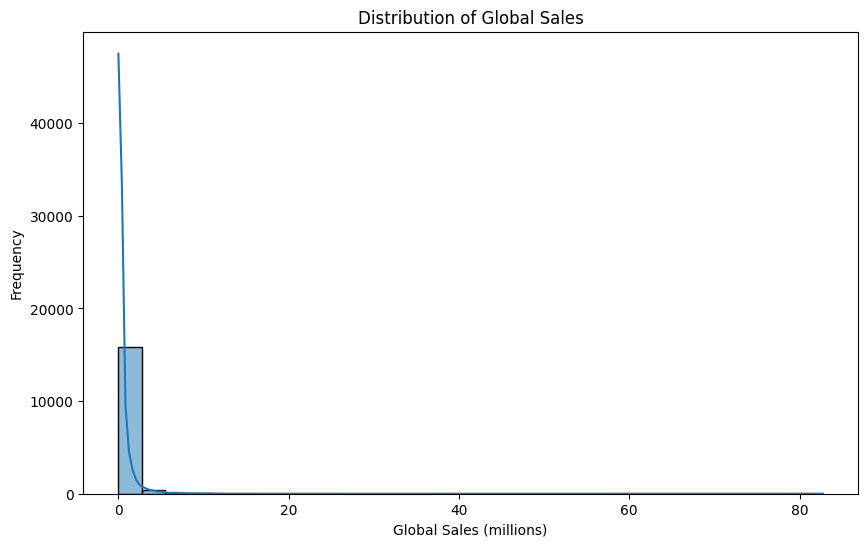

In [3]:
# Distribution of Global Sales
plt.figure(figsize=(10,6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.show()

In [2]:
# Total game sales by year (highest to lowest)
year_sum=df.groupby(["Year"])["Global_Sales"].sum()\
.sort_values(ascending=False)\
.reset_index(name="Total Sales")

year_sum

,Year,Total Sales
0,2008,678.90
1,2009,667.30
2,2007,611.13
3,2010,600.45
4,2006,521.04
5,2011,515.99
6,2005,458.65
7,2004,419.31
8,2002,395.52
9,2013,368.11


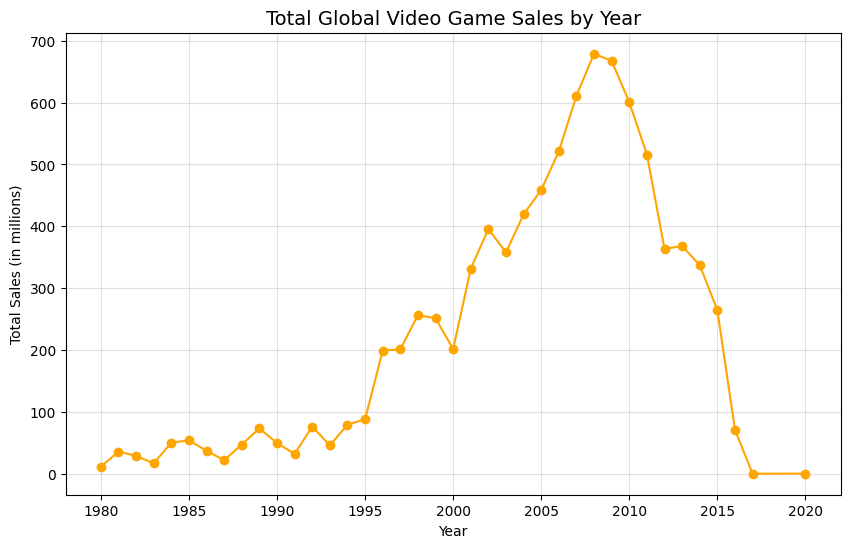

In [3]:
# Total Sales By Year Chronologically

year_sum = (
    df.groupby('Year')['Global_Sales'].sum()
      .reset_index(name='Total Sales')
)

# Draw theline plot
plt.figure(figsize=(10,6))
plt.plot(year_sum['Year'], year_sum['Total Sales'], marker='o', color='orange')
plt.title('Total Global Video Game Sales by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, alpha=0.4)
plt.show()


<Axes: xlabel='Year', ylabel='Total Sales'>

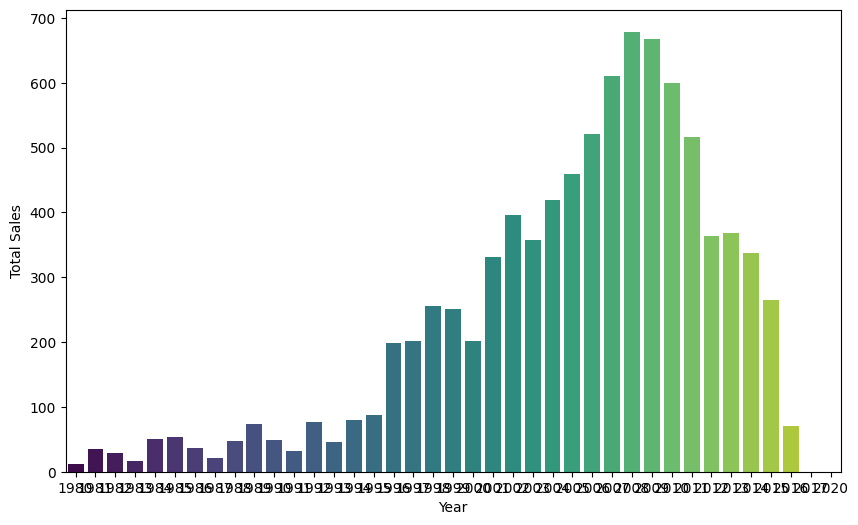

In [19]:
# Total Sales By Year (Bar Graph)
plt.figure(figsize=(10,6))
sns.barplot(data=year_sum.sort_values('Total Sales', ascending=False),
            x='Year', y='Total Sales', palette='viridis')
plt.title('Top-Selling Years for Video Games')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Total Sales by Region
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
region_sum = df[region_cols].sum().sort_values(ascending=False)

print(region_sum)


Global_Sales    8818.98
NA_Sales        4332.43
EU_Sales        2408.88
JP_Sales        1284.28
Other_Sales      788.89
dtype: float64


/tmp/ipython-input-1522456128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sum.index, y=region_sum.values, palette='pastel')


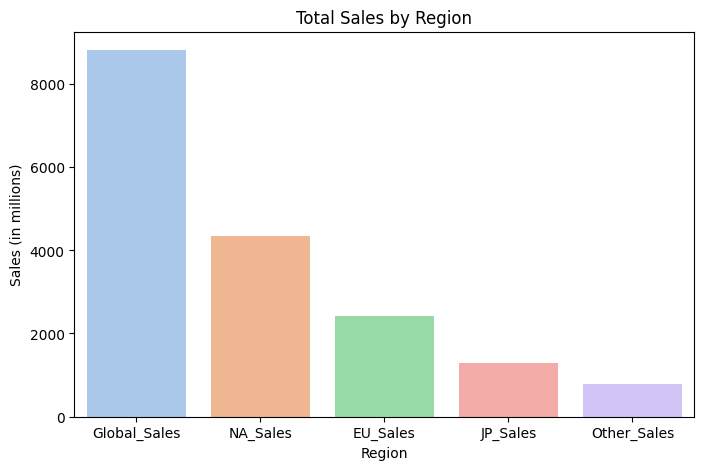

In [6]:
# Total Sales by Region Plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_sum.index, y=region_sum.values, palette='pastel')
plt.title('Total Sales by Region')
plt.ylabel('Sales (in millions)')
plt.xlabel('Region')
plt.show()


In [7]:
# Total Global Sales By Publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
publisher_sales.head(10)

,Publisher,Global_Sales
0,nintendo,1784.43
1,electronic arts,1092.01
2,activision,721.41
3,sony computer entertainment,607.28
4,ubisoft,473.54
5,taketwo interactive,399.30
6,thq,340.44
7,konami digital entertainment,278.56
8,sega,270.70
9,namco bandai games,253.65


/tmp/ipython-input-2379273342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=publisher_sales.head(10), x='Global_Sales', y='Publisher', palette='crest')


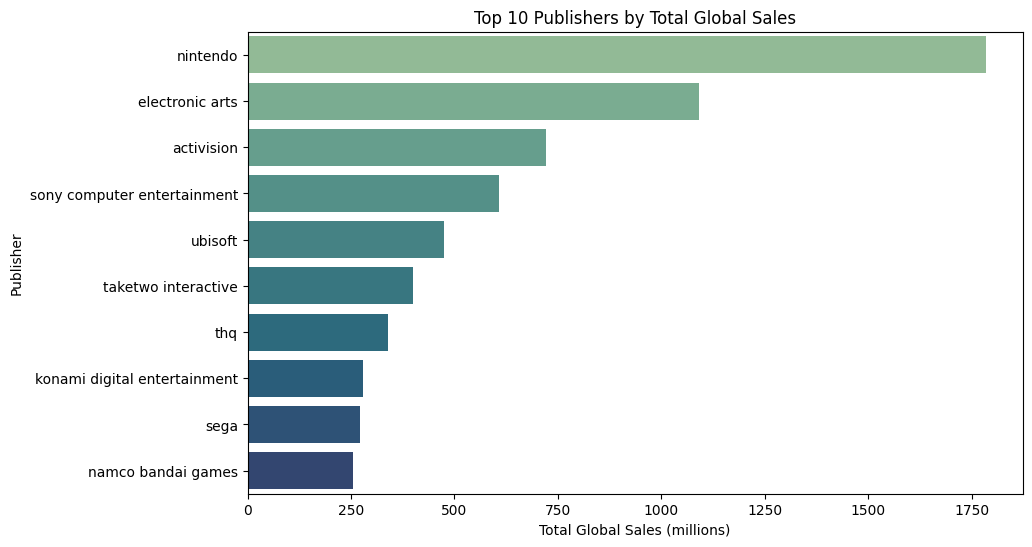

In [8]:
# Top Publishers
plt.figure(figsize=(10,6))
sns.barplot(data=publisher_sales.head(10), x='Global_Sales', y='Publisher', palette='crest')
plt.title('Top 10 Publishers by Total Global Sales')
plt.xlabel('Total Global Sales (millions)')
plt.ylabel('Publisher')
plt.show()


In [9]:
# Compare “Popularity” (count of titles) vs. “Profitability” (avg. sales per title)
publisher_stats = (
    df.groupby('Publisher')
      .agg({'Name': 'count', 'Global_Sales': ['sum', 'mean']})
      .reset_index()
)

publisher_stats.columns = ['Publisher', 'Num_Titles', 'Total_Sales', 'Avg_Sales']
publisher_stats.sort_values('Total_Sales', ascending=False).head(10)


,Publisher,Num_Titles,Total_Sales,Avg_Sales
366,nintendo,696,1784.43,2.563836
138,electronic arts,1336,1092.01,0.817373
16,activision,966,721.41,0.746801
461,sony computer entertainment,682,607.28,0.890440
528,ubisoft,918,473.54,0.515839
494,taketwo interactive,412,399.30,0.969175
511,thq,712,340.44,0.478146
281,konami digital entertainment,823,278.56,0.338469
449,sega,632,270.70,0.428323
349,namco bandai games,928,253.65,0.273330


/tmp/ipython-input-1878405487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_index, x='Profitability_Index', y='Publisher', palette='viridis')


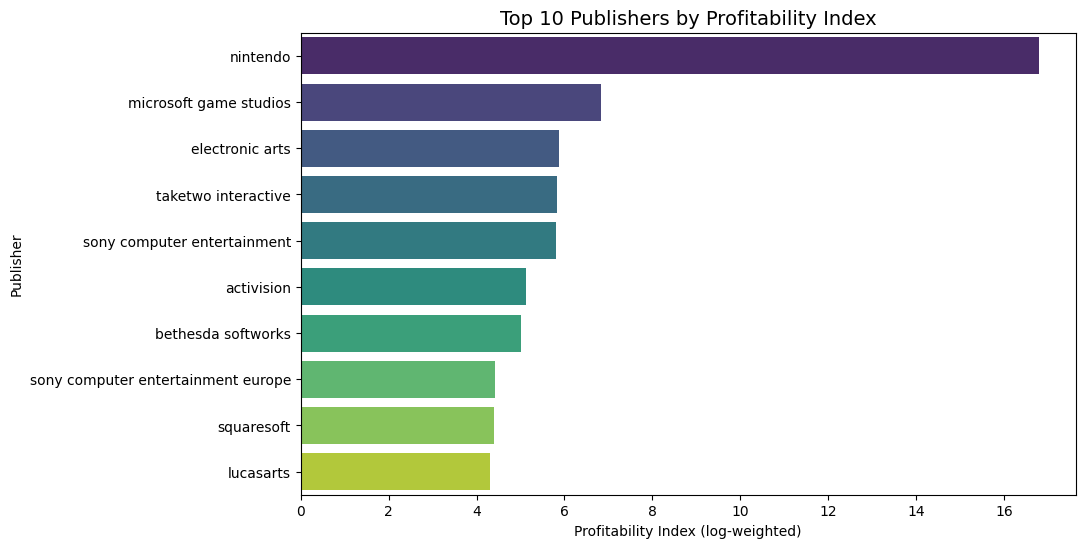

In [10]:
# Profitability Index=Avg_Sales×log(Num_Titles)
publisher_stats['Profitability_Index'] = publisher_stats['Avg_Sales'] * np.log1p(publisher_stats['Num_Titles'])
top_index = publisher_stats.sort_values('Profitability_Index', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_index, x='Profitability_Index', y='Publisher', palette='viridis')
plt.title('Top 10 Publishers by Profitability Index', fontsize=14)
plt.xlabel('Profitability Index (log-weighted)')
plt.ylabel('Publisher')
plt.show()

In [11]:
# Platform Sales
df = pd.read_csv("vgsales_clean.csv")

platform_sales = (
    df.groupby('Platform')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)
platform_sales.head(10)

,Platform,Global_Sales
0,ps2,1233.46
1,x360,968.32
2,ps3,949.34
3,wii,909.81
4,ds,818.96
5,ps,727.39
6,gba,313.56
7,psp,291.71
8,ps4,278.10
9,pc,254.97


/tmp/ipython-input-3994511267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_sales.head(10), x='Global_Sales', y='Platform', palette='rocket')


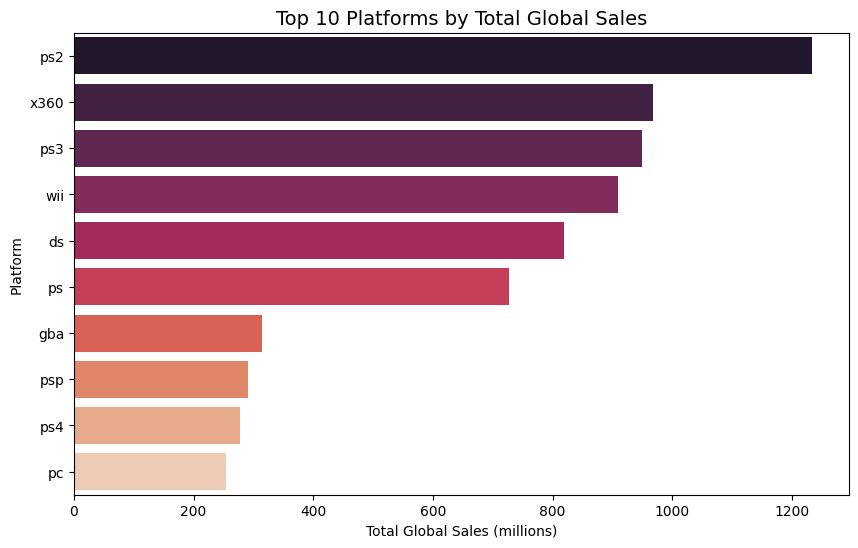

In [12]:
# Top 10 Platforms by Global Sales
plt.figure(figsize=(10,6))
sns.barplot(data=platform_sales.head(10), x='Global_Sales', y='Platform', palette='rocket')
plt.title('Top 10 Platforms by Total Global Sales', fontsize=14)
plt.xlabel('Total Global Sales (millions)')
plt.ylabel('Platform')
plt.show()


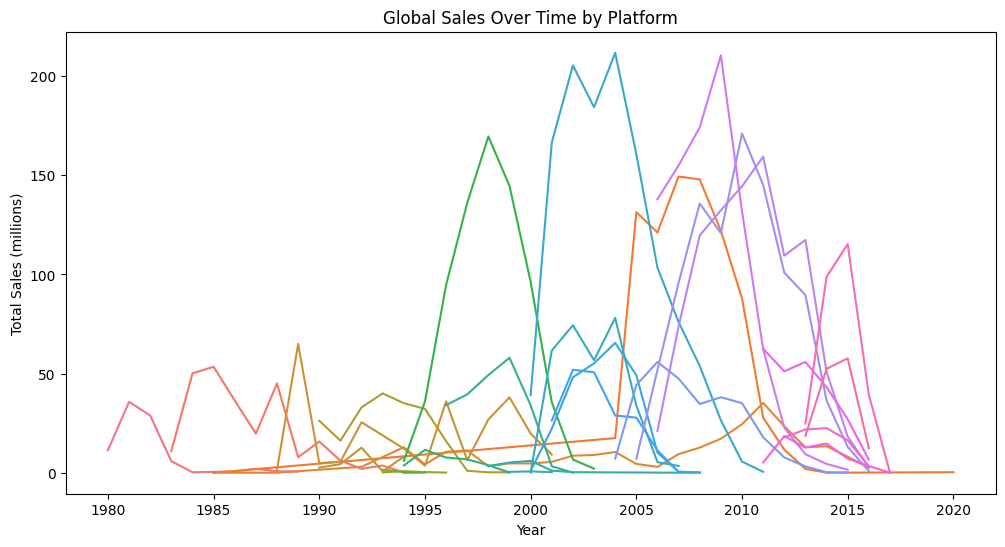

In [13]:
platform_year = (
    df.groupby(['Year', 'Platform'])['Global_Sales']
      .sum()
      .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=platform_year, x='Year', y='Global_Sales', hue='Platform', legend=False)
plt.title('Global Sales Over Time by Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.show()


In [14]:
# Correlation Heatmap

# Select relevant columns
cols = ['Year', 'Genre', 'Platform', 'Publisher',
        'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

data = df[cols].copy()

# Encode categorical variables
for col in ['Genre', 'Platform', 'Publisher']:
    data[col] = data[col].astype('category').cat.codes

In [15]:
corr = data.corr(numeric_only=True)
corr

,Year,Genre,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.125101,0.164372,0.025741,-0.091359,0.006041,-0.169300,0.041088,-0.074696
Genre,-0.125101,1.000000,0.028524,-0.053632,0.018074,0.017136,0.030487,0.009979,0.022323
Platform,0.164372,0.028524,1.000000,-0.023046,0.041081,0.046392,-0.079172,0.054892,0.027477
Publisher,0.025741,-0.053632,-0.023046,1.000000,0.005670,0.012855,0.052651,0.013569,0.019211
NA_Sales,-0.091359,0.018074,0.041081,0.005670,1.000000,0.768951,0.451302,0.634508,0.941270
EU_Sales,0.006041,0.017136,0.046392,0.012855,0.768951,1.000000,0.436411,0.726265,0.903276
JP_Sales,-0.169300,0.030487,-0.079172,0.052651,0.451302,0.436411,1.000000,0.290652,0.612801
Other_Sales,0.041088,0.009979,0.054892,0.013569,0.634508,0.726265,0.290652,1.000000,0.747972
Global_Sales,-0.074696,0.022323,0.027477,0.019211,0.941270,0.903276,0.612801,0.747972,1.000000


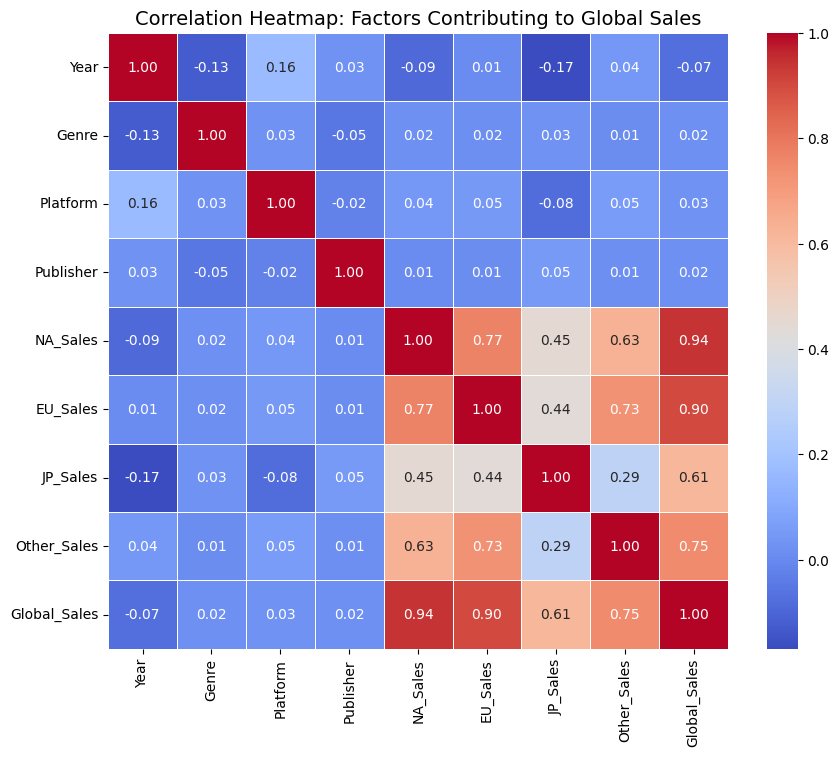

In [16]:

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Factors Contributing to Global Sales', fontsize=14)
plt.show()


/tmp/ipython-input-1821333488.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr2.values, y=corr2.index, palette='crest')


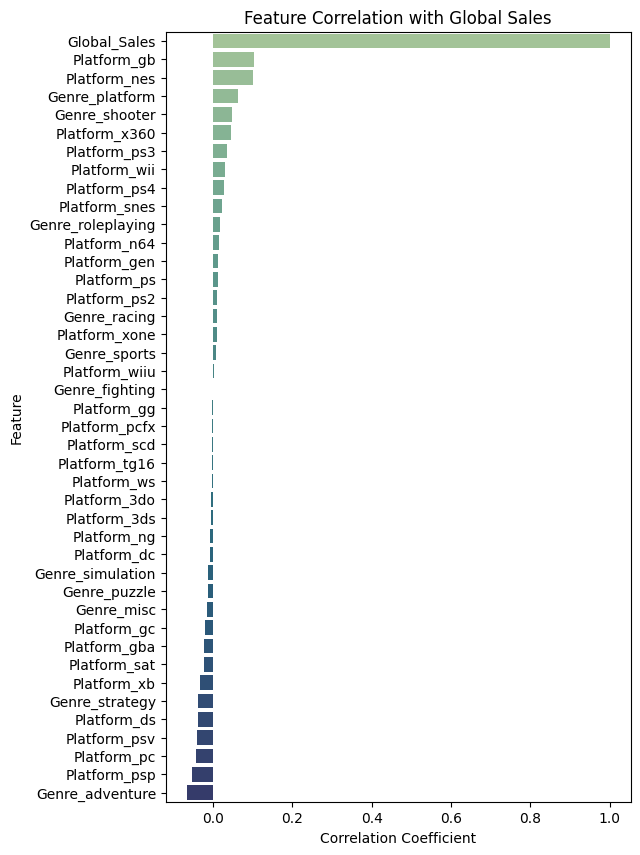

In [17]:
# Which Genres/platforms Drive Higher Sales
df_encoded = pd.get_dummies(df[['Genre', 'Platform', 'Global_Sales']], drop_first=True)
corr2 = df_encoded.corr()['Global_Sales'].sort_values(ascending=False)

plt.figure(figsize=(6,10))
sns.barplot(x=corr2.values, y=corr2.index, palette='crest')
plt.title('Feature Correlation with Global Sales')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()
